# Introduction:

Credit card default is a serious problem that can have a significant impact on individuals and businesses. In this project, we will build a machine learning model to predict whether a customer will default on their credit card.

We will use two machine learning models: random forest and gradient boosting. We will evaluate the models using accuracy, precision, recall, and f1-score.

In [1]:
!mkdir -p ~/.kaggle

!cp kaggle.json /root/.kaggle/

import os
for filename in os.listdir('/content'):
    print(filename)

# Set the permissions for the kaggle.json file to make it readable only by the owner
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d nanditapore/credit-risk-analysis

!unzip credit-risk-analysis.zip

.config
kaggle.json
sample_data
100% 414k/414k [00:00<00:00, 576kB/s]
100% 414k/414k [00:00<00:00, 576kB/s]
Archive:  credit-risk-analysis.zip
  inflating: credit_risk.csv         


## Step 1: Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC  # Import Support Vector Classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

## Step 2: Reading the Data:

In [2]:
data = pd.read_csv('/content/credit_risk.csv')
data.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


## Step 3: Understanding the Data:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [4]:
data.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
data.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

## Step 4: Preprocessing the Data:

In [6]:
data = data.drop(columns = ['Id'])
data = pd.get_dummies(data, columns = ['Home', 'Intent', 'Default'])

In [7]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

In [8]:
data_imputed.isnull().sum()

Age                         0
Income                      0
Emp_length                  0
Amount                      0
Rate                        0
Status                      0
Percent_income              0
Cred_length                 0
Home_MORTGAGE               0
Home_OTHER                  0
Home_OWN                    0
Home_RENT                   0
Intent_DEBTCONSOLIDATION    0
Intent_EDUCATION            0
Intent_HOMEIMPROVEMENT      0
Intent_MEDICAL              0
Intent_PERSONAL             0
Intent_VENTURE              0
Default_N                   0
Default_Y                   0
dtype: int64

## Step 5 - Analysing the Data:

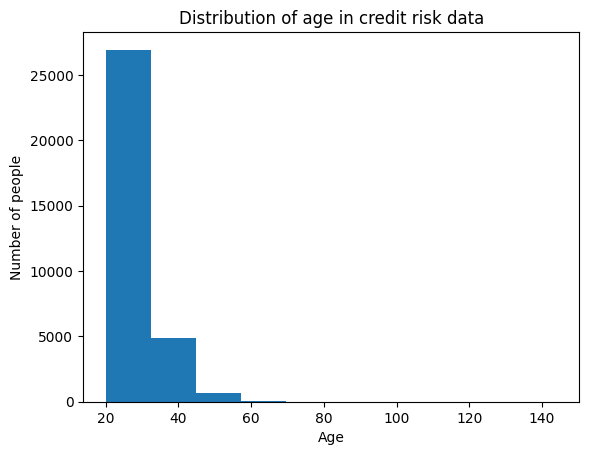

In [9]:
# Look at the distribution of the age variable
plt.hist(data_imputed["Age"])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of age in credit risk data")
plt.show()

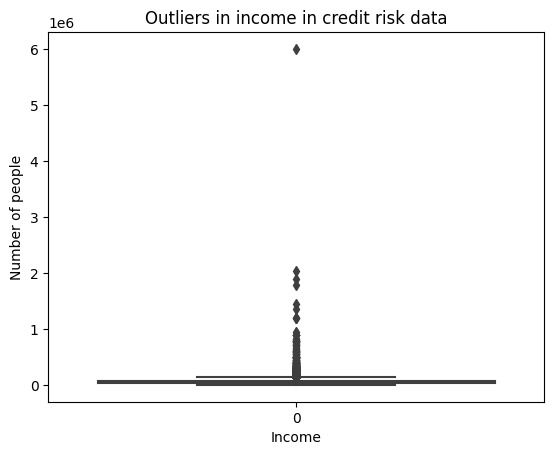

In [10]:
# Look at the outliers in the income variable
sns.boxplot(data_imputed["Income"])
plt.xlabel("Income")
plt.ylabel("Number of people")
plt.title("Outliers in income in credit risk data")
plt.show()

* need improvement idea on the above

<Figure size 1200x800 with 0 Axes>

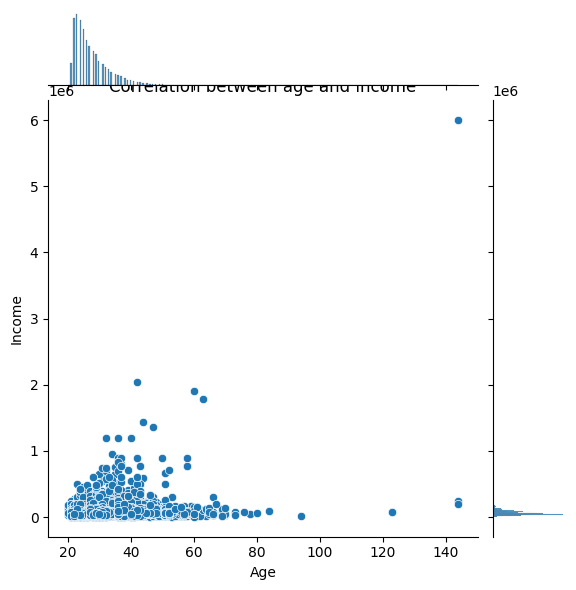

In [11]:
# Look at the correlation between the age and income variables
plt.figure(figsize=(12, 8))
sns.jointplot(x="Age", y="Income", data=data_imputed)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Correlation between age and income")
plt.show()

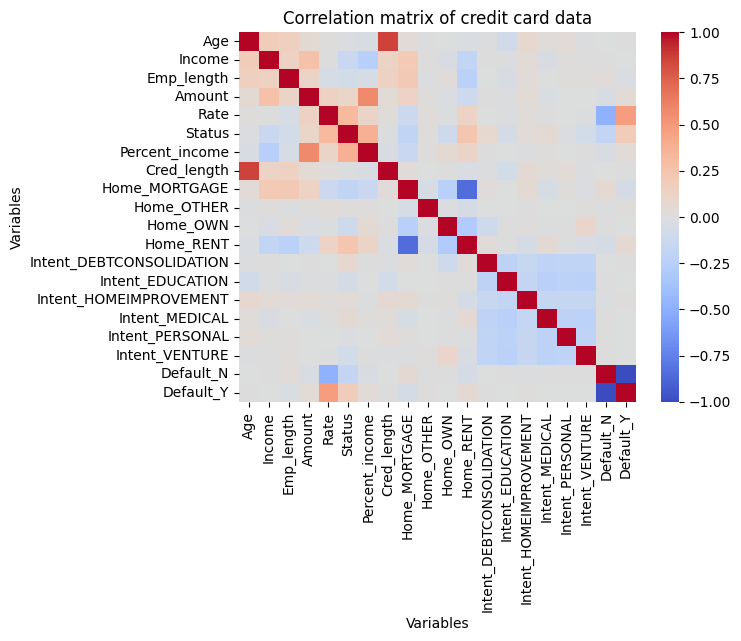

In [12]:
# Look at the correlation between the default and all other variables
corr = data_imputed.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.title("Correlation matrix of credit card data")
plt.show()

<ipython-input-13-3fce58a86cf8>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Age", y="Default_Y", data=data_imputed, ci=None)


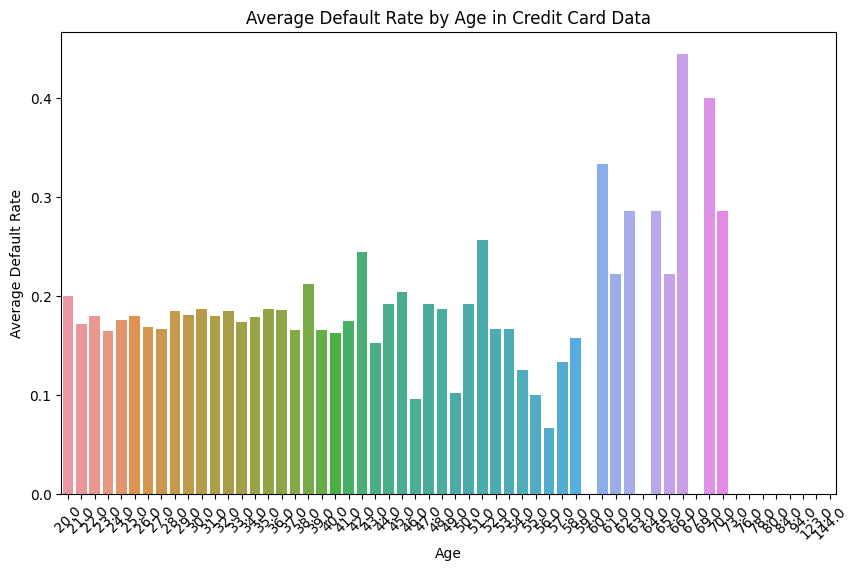

In [13]:
# Look at the scatter plot of the age and default variables
plt.figure(figsize=(10, 6))

# Create a bar chart to visualize the average default rate for different age groups
sns.barplot(x="Age", y="Default_Y", data=data_imputed, ci=None)
plt.xlabel("Age")
plt.ylabel("Average Default Rate")
plt.title("Average Default Rate by Age in Credit Card Data")
plt.xticks(rotation=45)
plt.show()

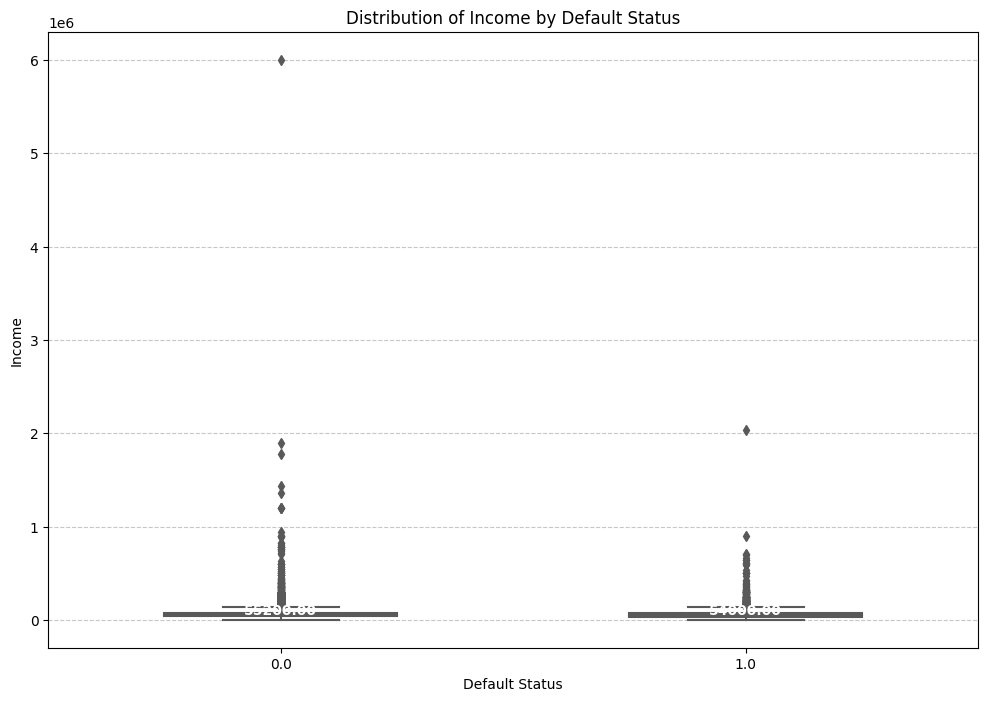

In [14]:
plt.figure(figsize=(12, 8))

# Create a box plot to visualize the distribution of income by default status
sns.boxplot(x="Default_Y", y="Income", data=data_imputed, orient="v",
            width=0.5, palette="Set2")
plt.xlabel("Default Status")
plt.ylabel("Income")
plt.title("Distribution of Income by Default Status")

# Add median labels to the box plots
medians = data_imputed.groupby("Default_Y")["Income"].median()
vertical_offset = data_imputed["Income"].median() * 0.05
for xtick in plt.gca().get_xticks():
    plt.text(xtick, medians[xtick] + vertical_offset, f"{medians[xtick]:.2f}",
             horizontalalignment='center', size='medium', color='w',
             weight='semibold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* need improvement idea on the above

## Step 6 - Modelling:

In [15]:
# Splitting data into features (X) and target (y)
X = data_imputed.drop(columns=['Status'])
y = data_imputed['Status']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [17]:
# Create the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state = 42)

# Create the Gradient Boosting Classifier model
gbt_clf = GradientBoostingClassifier()

# Train the models
rf_clf.fit(X_train, y_train)
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier()

## Step 7 - Predicting:

In [19]:
# Make predictions on the test set using the Random Forest model
rf_pred = rf_clf.predict(X_test)

# Make predictions on the test set using the Gradient Boosting model
gbt_pred = gbt_clf.predict(X_test)

## Step 8 - Visualizing the Feature Importance and Accuracy of the models:

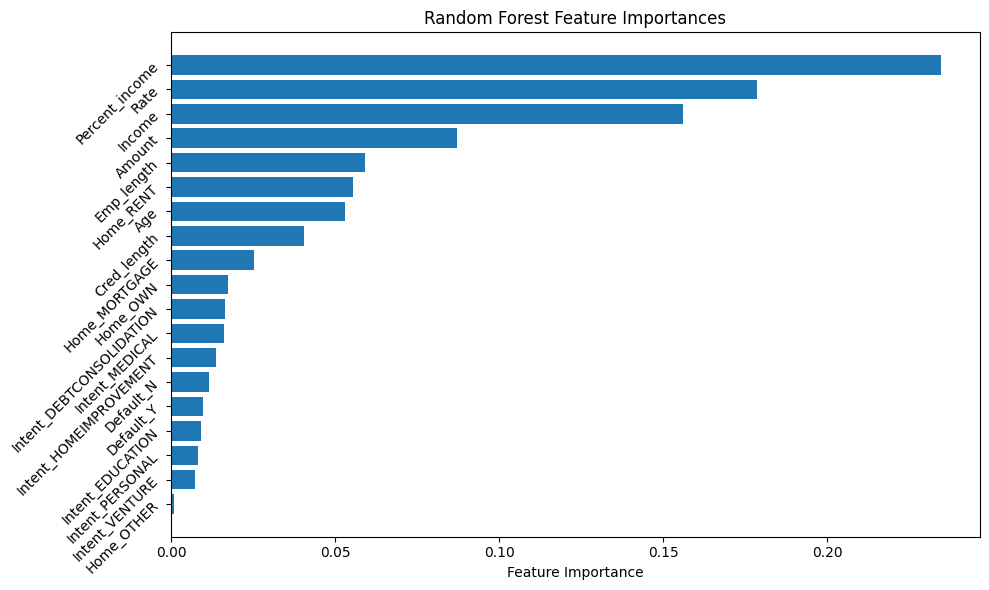

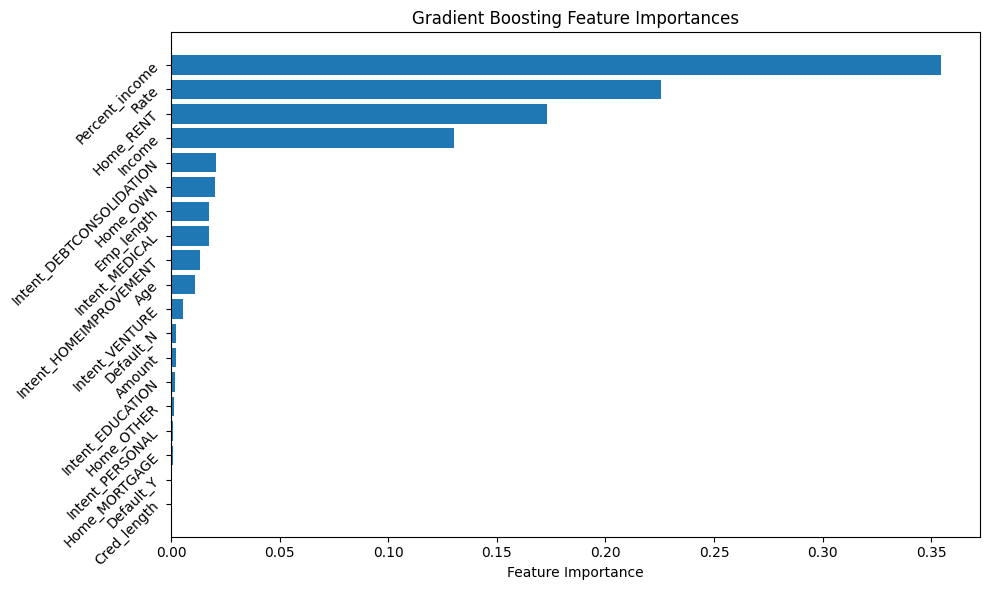

In [21]:
# Plot feature importances of Random Forest
feature_importances = rf_clf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# Plot feature importances of GBT
feature_importances = gbt_clf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importances")
plt.tight_layout()
plt.show()

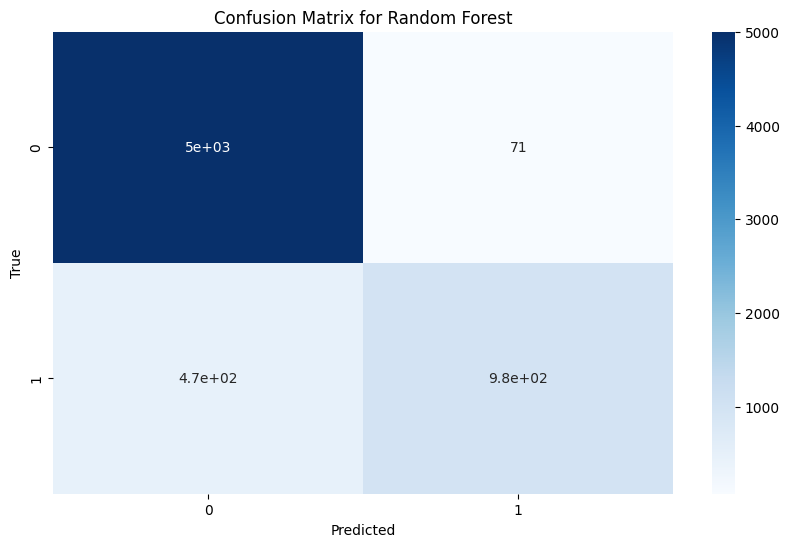

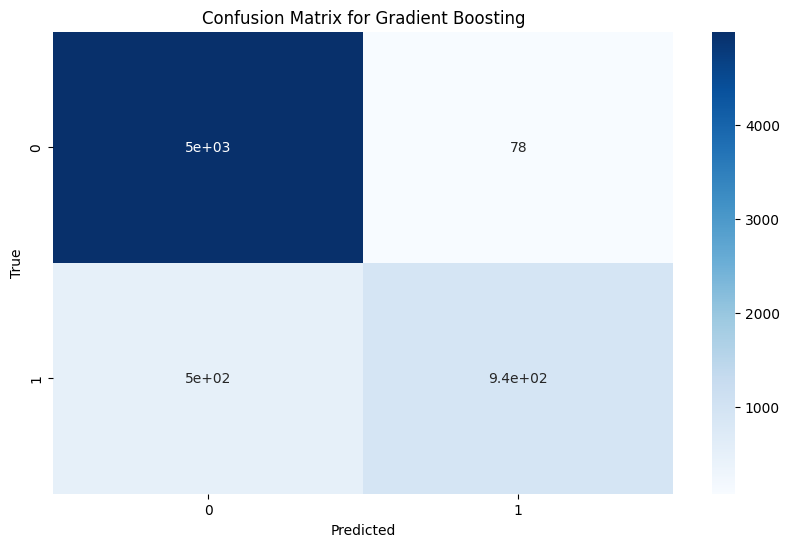

In [22]:
# Confusion matrix for the Random Forest model
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Confusion matrix for the Gradient Boosting model
cm_gbt = confusion_matrix(y_test, gbt_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_gbt, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

In [23]:
# Print accuracy for the Random Forest model
from sklearn.metrics import accuracy_score

acc_rf = accuracy_score(y_test, rf_pred)
print("Accuracy for Random Forest:", acc_rf)

# Print classification report for the Random Forest model
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))

# Print accuracy for the Gradient Boosting model
acc_gbt = accuracy_score(y_test, gbt_pred)
print("Accuracy for Gradient Boosting:", acc_gbt)

# Print classification report for the Gradient Boosting model
print(classification_report(y_test, gbt_pred))

Accuracy for Random Forest: 0.917446677919288
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      5072
         1.0       0.93      0.68      0.78      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.83      0.87      6517
weighted avg       0.92      0.92      0.91      6517

Accuracy for Gradient Boosting: 0.9108485499462943
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      5072
         1.0       0.92      0.65      0.76      1445

    accuracy                           0.91      6517
   macro avg       0.92      0.82      0.85      6517
weighted avg       0.91      0.91      0.90      6517

